In [2]:
#We need US zip codes. So we install zipcodes library.
!pip install zipcodes

In [3]:
### IMPORT: needed libaries
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [4]:
data="Bank_Personal_Loan_Modelling.csv"
df=pd.read_csv(data)

In [5]:
df_loan=df.copy()
print(f'There are {df_loan.shape[0]} rows and {df_loan.shape[1]} columns')

There are 5000 rows and 14 columns


In [6]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [7]:
df_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [8]:
print("Number of rows and columns:", df_loan.shape)

Number of rows and columns: (5000, 14)


In [9]:
print ("#"*40,"\n","Features : \n\n", df_loan.columns.tolist()) #get name of columns/features

######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [10]:
print("Missing values: ", df_loan.isnull().sum().sort_values(ascending=False))

Missing values:  CreditCard            0
Online                0
CD Account            0
Securities Account    0
Personal Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIP Code              0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64


In [11]:
print( "#"*40,"\nPercent of missing :\n\n", round(df_loan.isna().sum() / df_loan.isna().count() * 100, 2)) # looking at columns with most Missing Values

######################################## 
Percent of missing :

 ID                   0.00000
Age                  0.00000
Experience           0.00000
Income               0.00000
ZIP Code             0.00000
Family               0.00000
CCAvg                0.00000
Education            0.00000
Mortgage             0.00000
Personal Loan        0.00000
Securities Account   0.00000
CD Account           0.00000
Online               0.00000
CreditCard           0.00000
dtype: float64


In [12]:
print ("#"*40,"\nUnique values :  \n\n", df_loan.nunique())  #  count of unique values

######################################## 
Unique values :  

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [13]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the columns are numerical here. Personal loan is target variable. Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

In [14]:
df_loan.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
340,341,59,34,91,93524,1,2.60000,1,0,0,0,0,1,1
4838,4839,56,30,44,91330,4,2.50000,1,0,0,0,0,0,1
994,995,32,8,42,90650,1,1.80000,2,0,0,0,0,0,0
4681,4682,27,3,68,95503,4,0.00000,1,0,0,0,0,0,1
2553,2554,39,15,91,93907,2,1.70000,2,151,0,0,0,0,0
72,73,44,20,130,92007,1,5.00000,1,0,0,0,0,0,1
4826,4827,56,31,81,93943,2,0.00000,3,225,0,0,0,0,0
84,85,46,22,18,91730,1,0.90000,3,0,0,0,0,1,0
2032,2033,62,37,32,90266,3,0.20000,1,0,0,1,0,0,1
1536,1537,36,12,73,95617,4,2.00000,3,188,0,0,0,1,0


Id column is not needed and can be dropped.

In [15]:
df_loan.drop(["ID"],axis=1,inplace=True)

# Data Preprocessing

Processing Zipcode
Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on location for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category

In [16]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [17]:
# get unique zipcodes
list_zipcode=df_loan.ZIPCode.unique()

In [18]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [19]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for 96651,92634,93077,92717. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [20]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [21]:
df_loan['County']=df_loan['ZIPCode'].map(dict_zip)

In [22]:
df_loan.County.nunique()

40

In [23]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


Fixing the data types
Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type to reduce the dataspace required.

In [24]:
# converting categorical variable to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

In [25]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 270.2 KB


we can see that the memory usage has decreased from 547 to 266.

**Processing Experience**

In [26]:
# checking negative and zero values for experience. 
df_loan[df_loan['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

52 customers from age group 23 - 30 have negative values in experience

In [27]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00000,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40000,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20000,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00000,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60000,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60000,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80000,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60000,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40000,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80000,2,0,0,0,0,0,0,Los Angeles County


In [28]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [29]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [30]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

Checking age and income for customers with 0 experience. We will see how to impute this columns more after EDA.

# Exploratory Data Analysis

In [31]:
df_loan.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.13460,73.77420,1.93794,56.49880
std,11.46317,11.41519,46.03373,1.74766,101.71380
min,23.00000,0.00000,8.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,0.70000,0.00000
50%,45.00000,20.00000,64.00000,1.50000,0.00000
75%,55.00000,30.00000,98.00000,2.50000,101.00000
max,67.00000,43.00000,224.00000,10.00000,635.00000


In [32]:
for column in category_col:
    print(df_loan[column].value_counts())
    print('*'*33)

0    4520
1     480
Name: PersonalLoan, dtype: int64
*********************************
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
*********************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*********************************
0    4698
1     302
Name: CDAccount, dtype: int64
*********************************
1    2984
0    2016
Name: Online, dtype: int64
*********************************
0    3530
1    1470
Name: CreditCard, dtype: int64
*********************************
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
92694      1
94965      1
94970      1
91024      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
*********************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
*********************************
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San

Observations

Customers age is in range of 23 - 67, with mean and median of ~45.
Maximum experience is 43 years. where as mean and median are ~20.
Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. 224 Max salary need to be verified
Maximum mortgage taken is 635k USD.Need to verify this
Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD
1095 customers are from Los Angeles County.
480 customers had borrowed loan before.

**Univariate Analysis**

In [33]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

AttributeError: module 'seaborn' has no attribute 'set_theme'

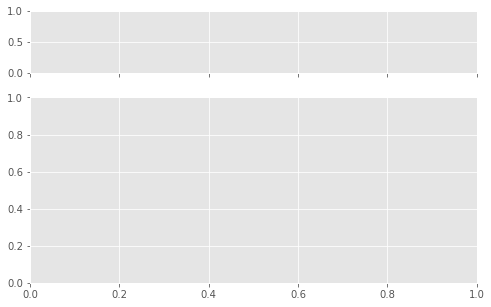

In [34]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

Observations

Age and experience both has same distrubtion with spike at 5 points.
Income is right skewed and has some outlier on higher side which can be clipped.
Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped.

Age

Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [35]:
df_loan['Agebin']=pd.cut(df_loan['Age'], bins=[0,30,40,50,60,100], labels=['18-30','31-40','41-50','51-60','61-100'])

Income

To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [36]:
# Create a new variable - Income group

df_loan["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

Spending

To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [37]:
df_loan.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [38]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

In [49]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_loan[variable], data=df_loan )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 1008x1440 with 0 Axes>

Observations

~29.4 % customers are single.
~41.9% customers are undergrad.
~9.6% bought a personal loan from the bank.
10.4 % customers have a securities account with the bank
6 % customer have a CD account.
60% customers transact online.
29.4% customers have credit cards.
~ 75 % of customers are in range of 31- 60.
~ 50 % Most of bank customers belong to middle income group.
~48 % of customers has medium Average spending

In [50]:
df_loan.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<Figure size 1080x1728 with 0 Axes>

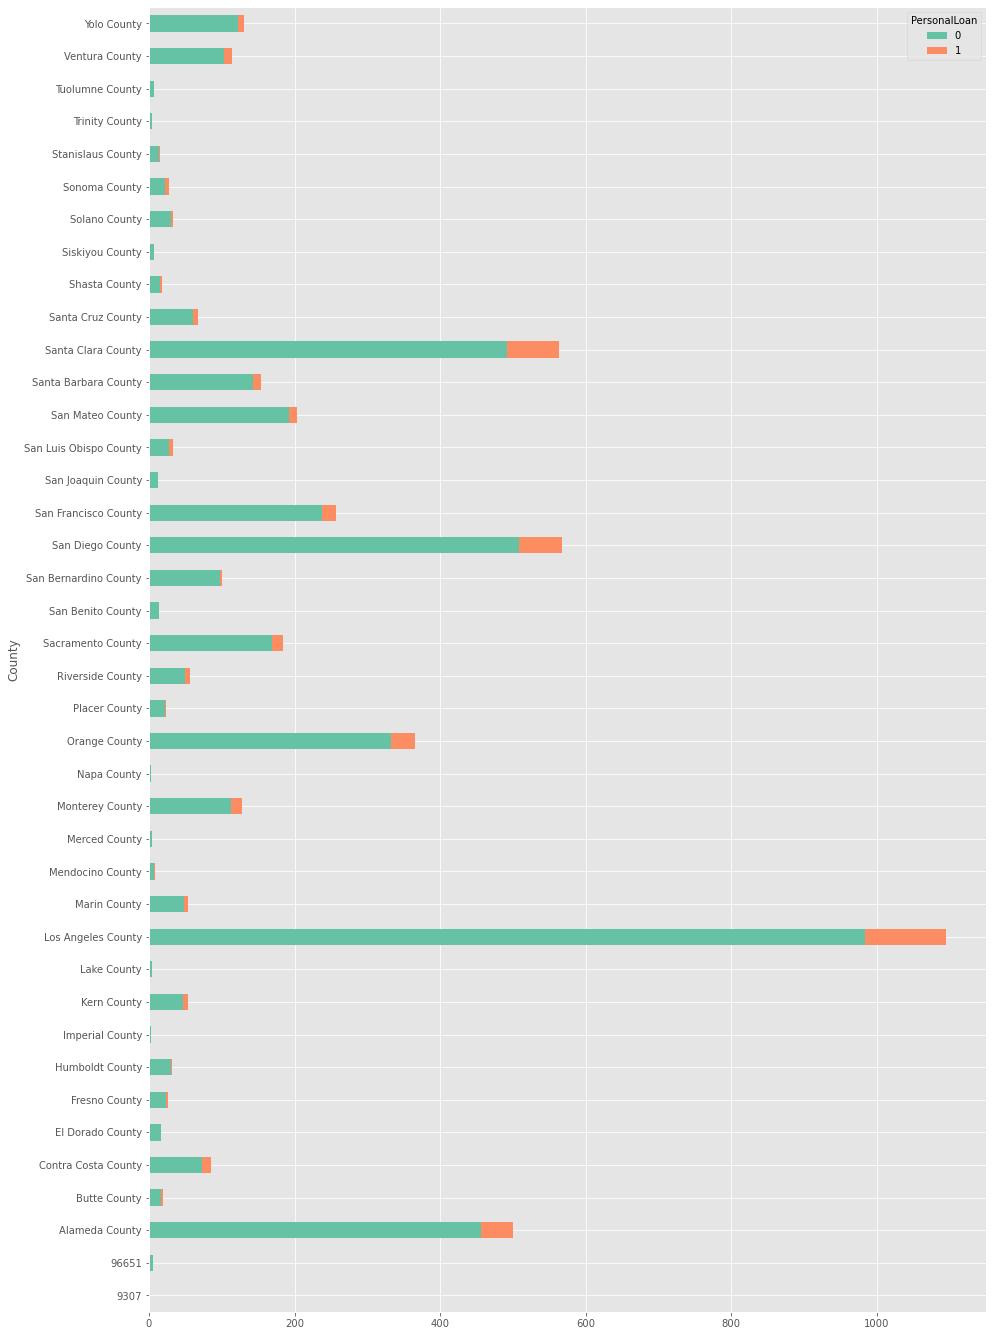

In [51]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df_loan['County'],columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

It can be seen the percentage of loan taken from various country differ.There are so many county converting them to regions will help in our model

In [52]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

Converting the county to regions based on https://www.calbhbc.org/region-map-and-listing.html

In [53]:
df_loan['Regions'] = df_loan['County'].map(counties)

In [54]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [55]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [56]:
df_loan.dropna(inplace=True)

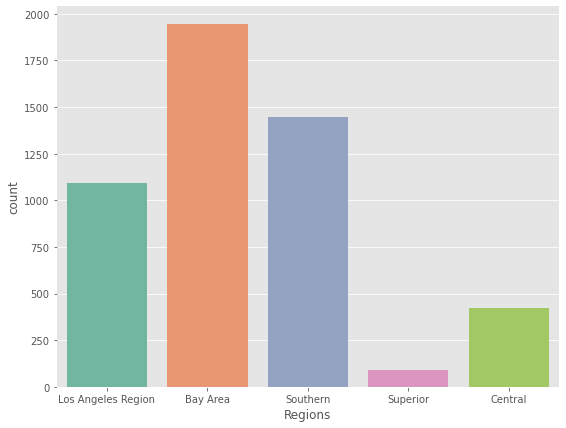

In [57]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

**Bivariate & Multivariate Analysis**

In [58]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

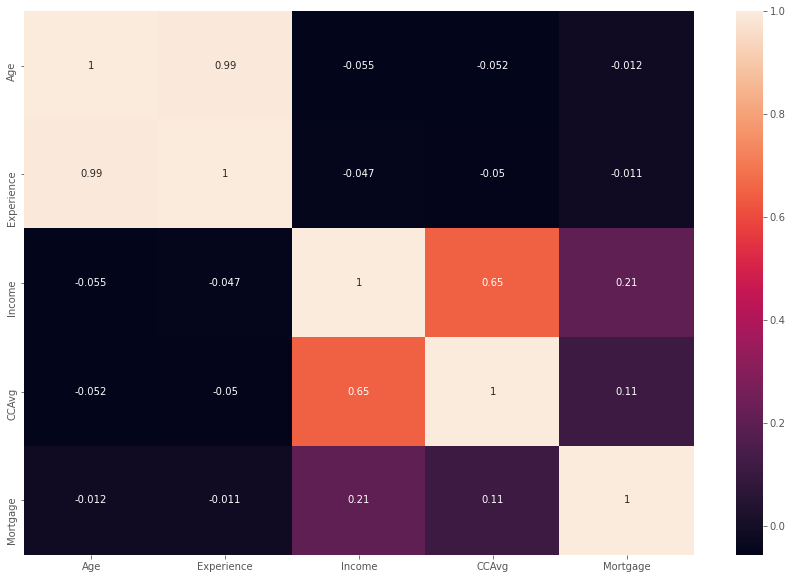

In [59]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

Observations

As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
Income and Average spending on credit card are positively corrleated.
Mortgage has very little correlation with income.

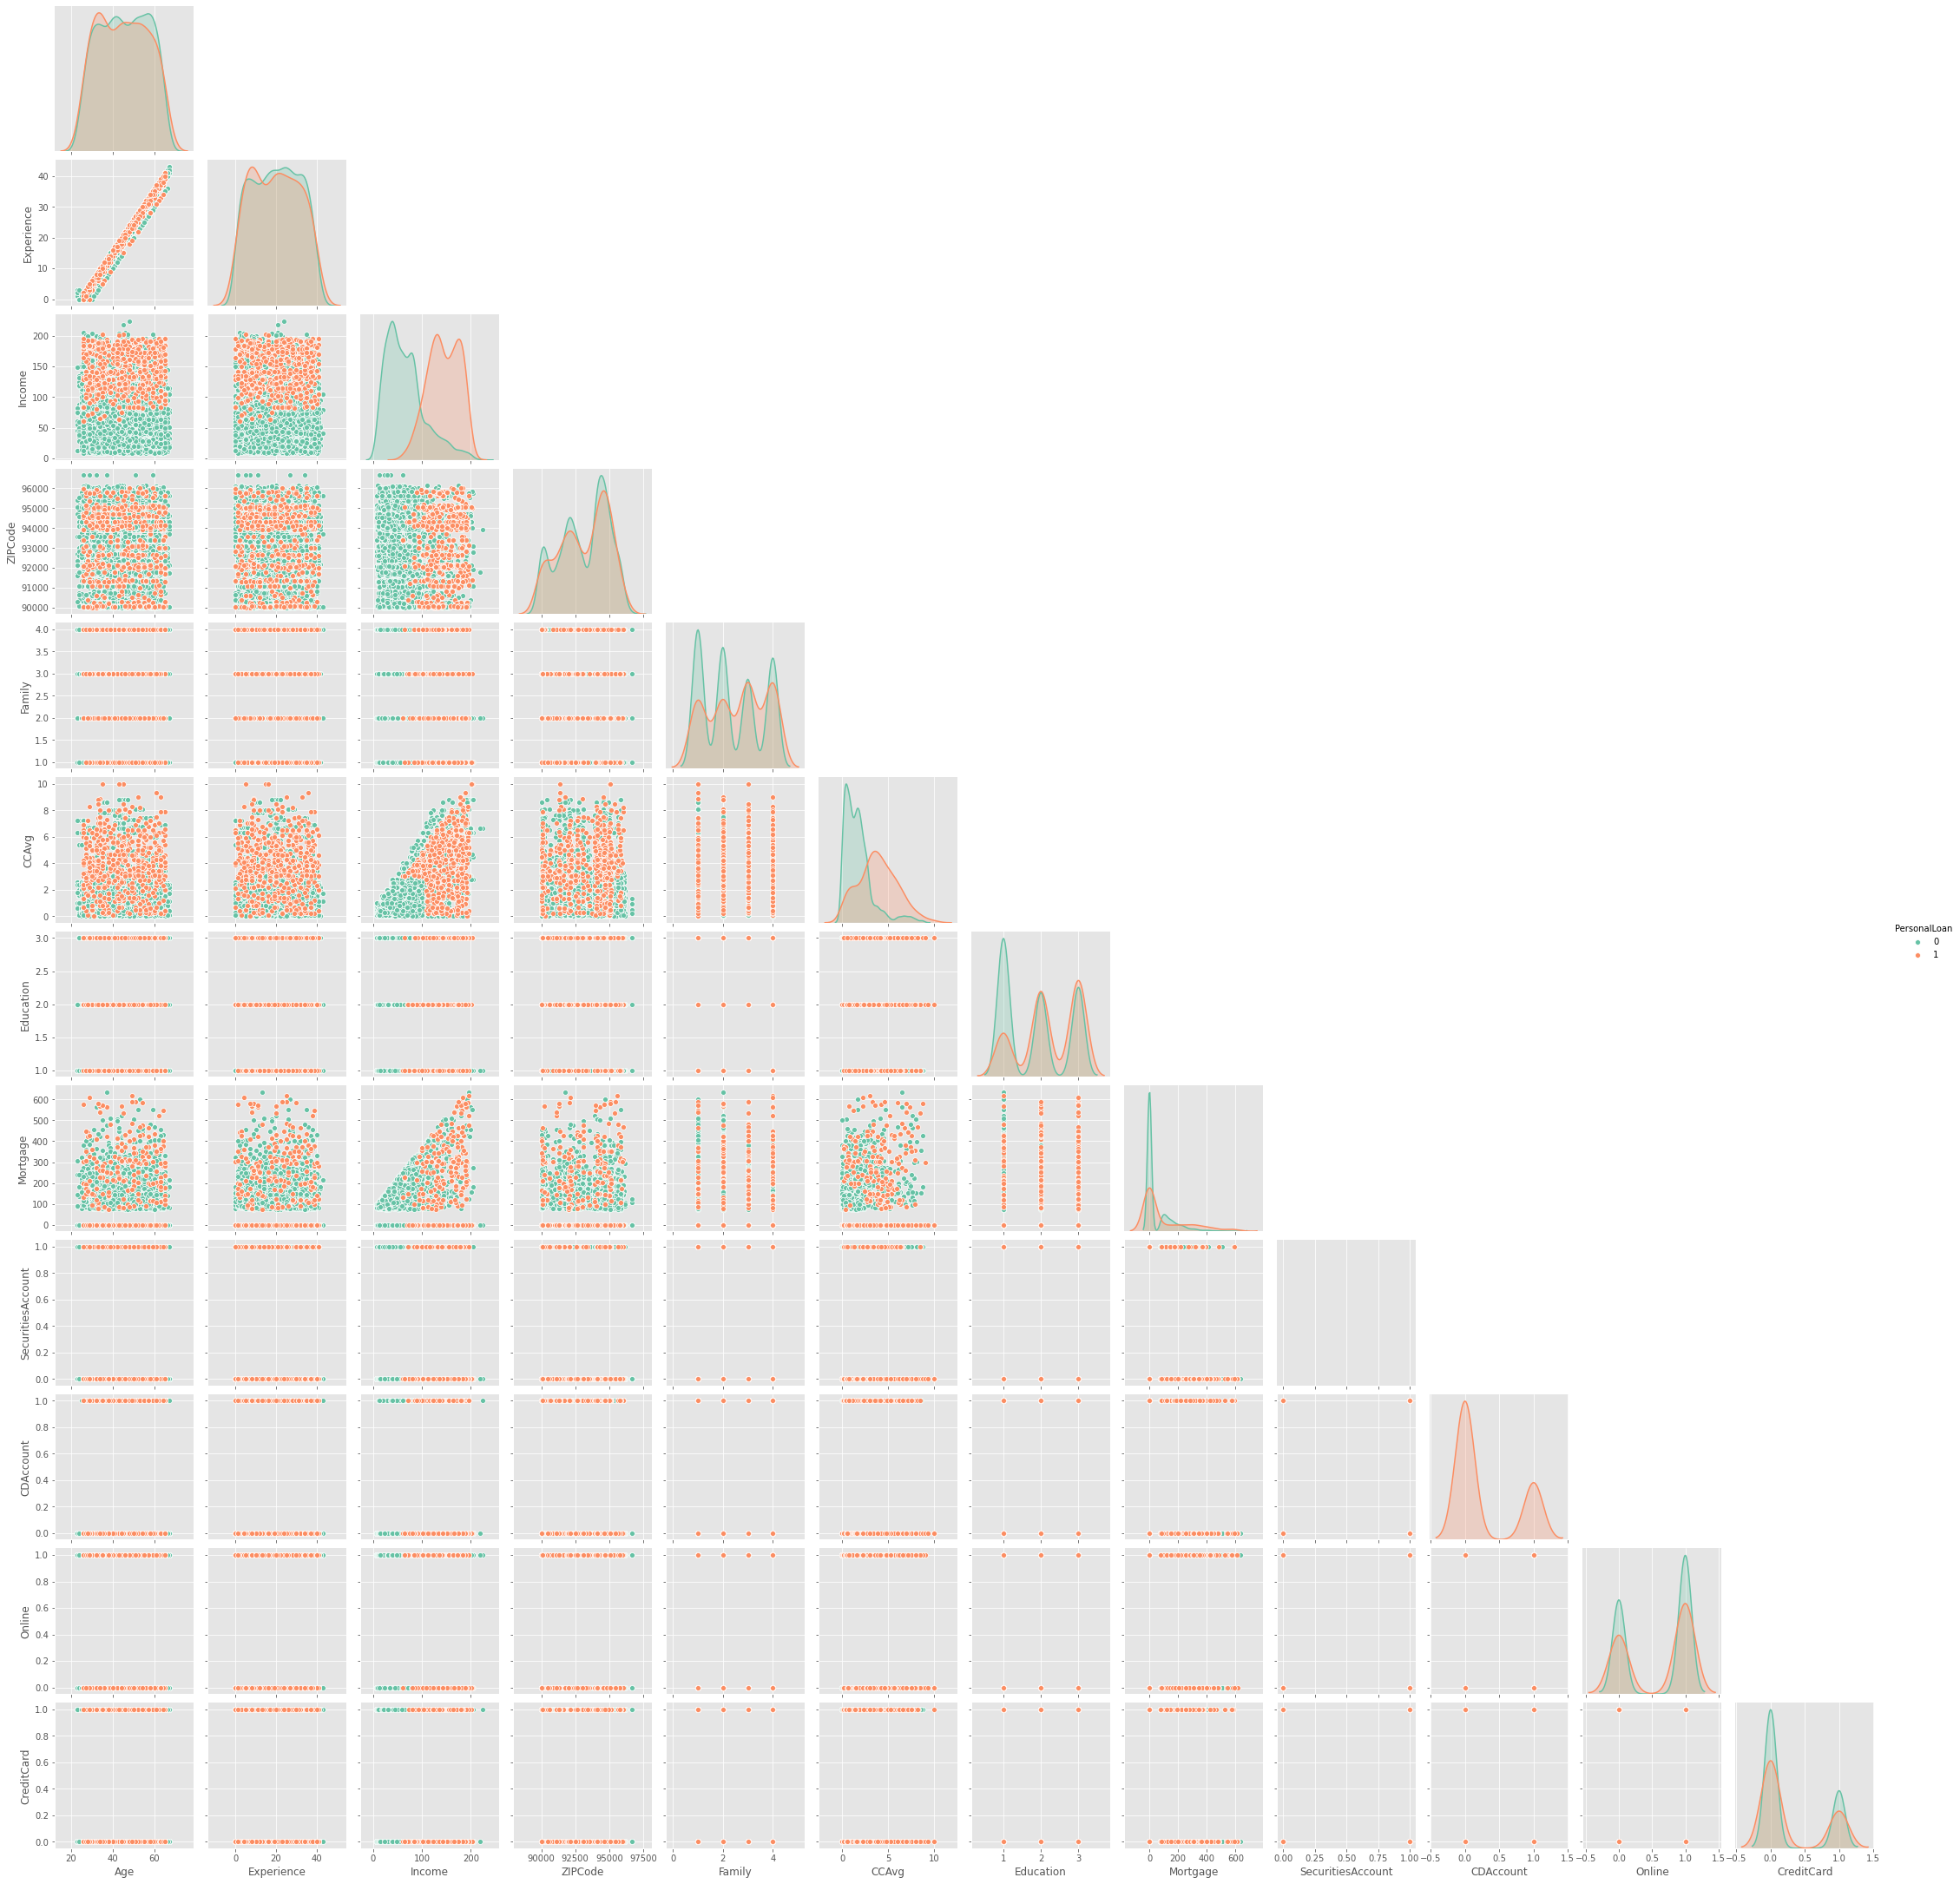

In [60]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_loan, hue="PersonalLoan",corner=True)
plt.show()

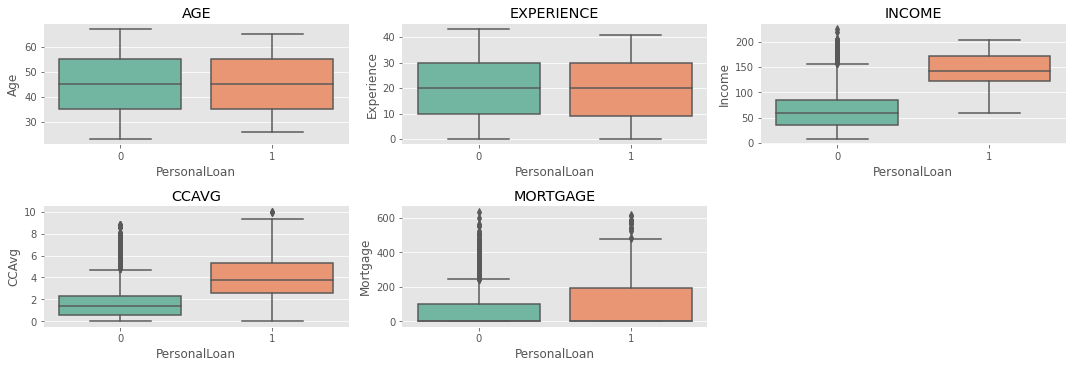

In [61]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= df_loan[variable], data=df_loan)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

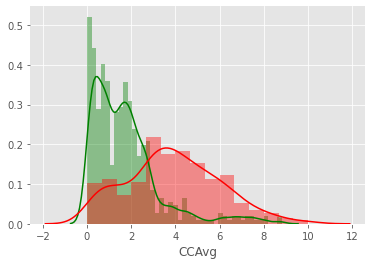

In [62]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

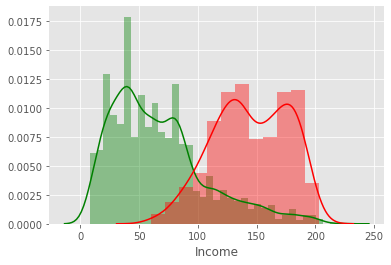

In [63]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

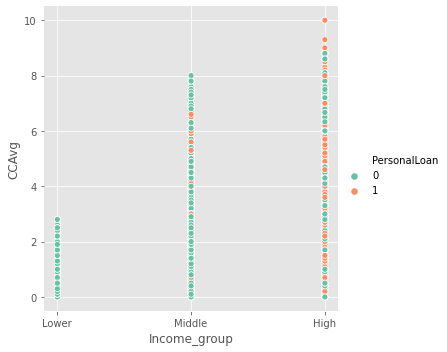

In [64]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

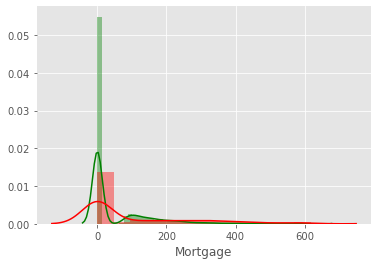

In [65]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

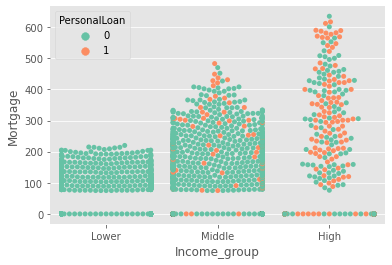

In [66]:
sns.swarmplot(x='Income_group',y='Mortgage',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

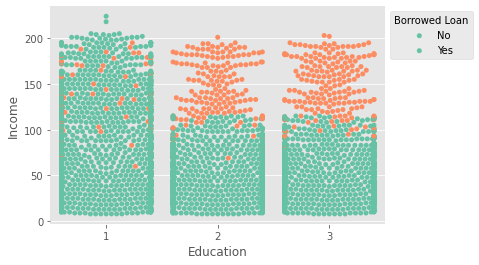

In [67]:
sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
labels=["No","Yes"]
plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))

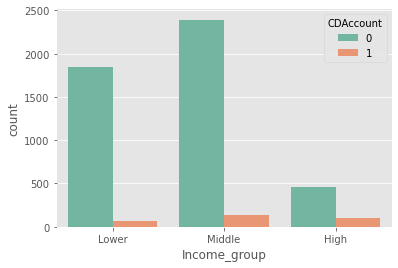

In [68]:
sns.countplot(x='Income_group',hue='CDAccount',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

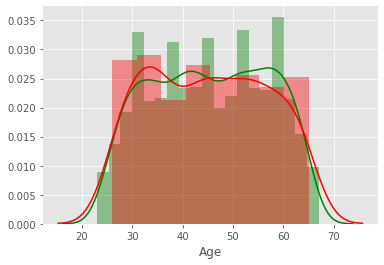

In [69]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Age'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

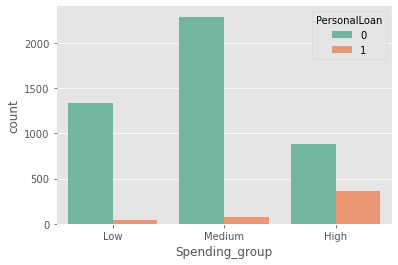

In [70]:
sns.countplot(x='Spending_group',hue='PersonalLoan',data=df_loan)

sns.despine(top=True,right=True,left=True) # to remove side line from graph

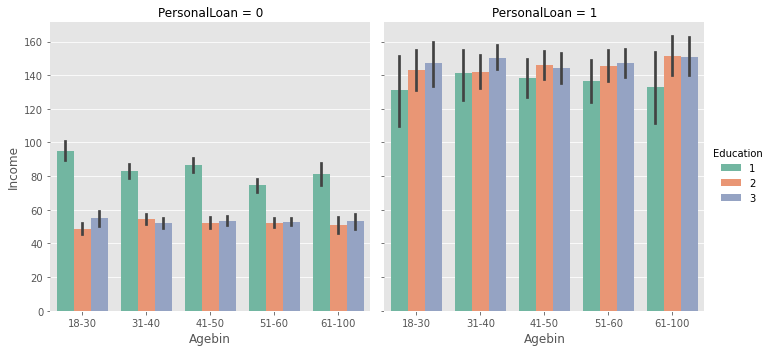

In [71]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="PersonalLoan", data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

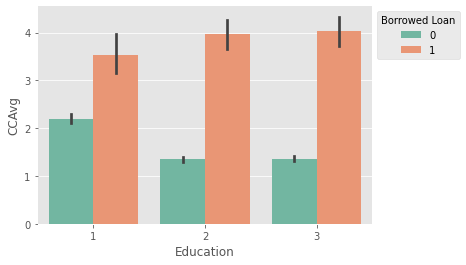

In [72]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_loan)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph

**Observations**

People with higher income had opted for personal loan before.

People with high mortgages opted for loan.

Customers with higher average monthly credit usage have opted for loan.

Customers with higher income had higher average credit card usage and mortgage.

Graduate and Advanced/Professional have higher monhtly credit card usage and have borrowed loans with the bank.

In [73]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


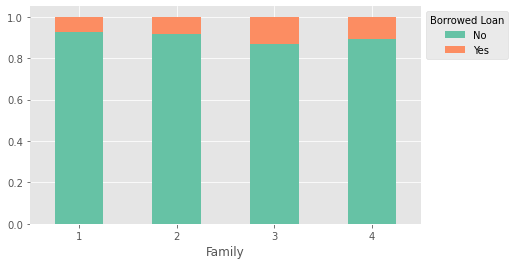

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


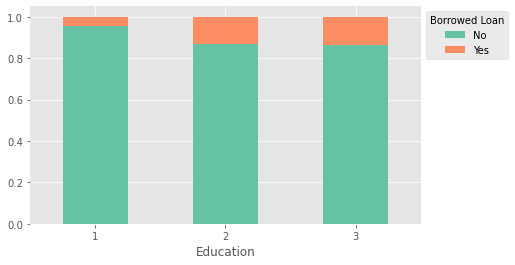

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


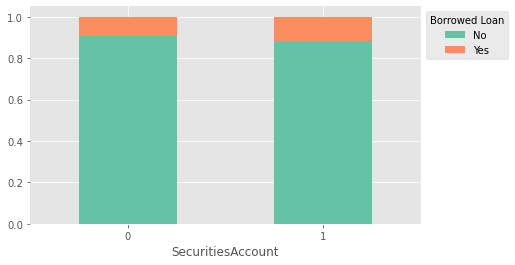

PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


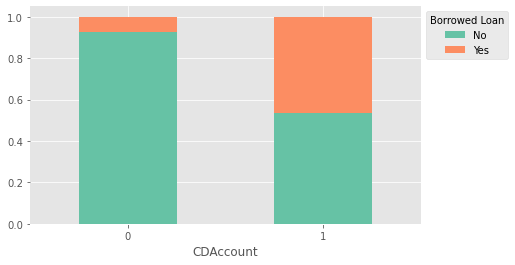

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


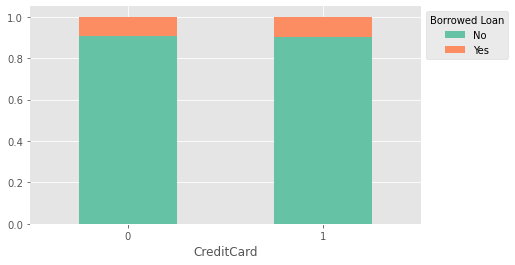

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


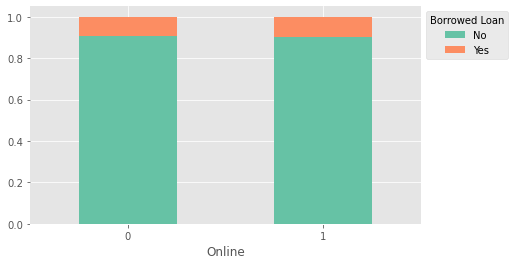

PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


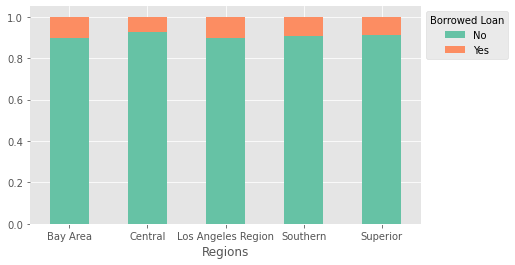

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
61-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


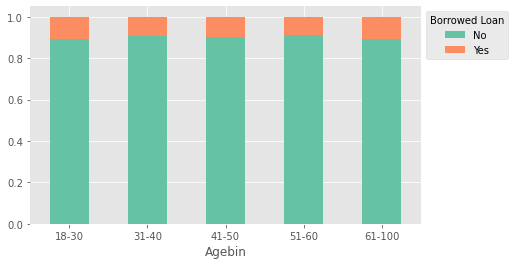

PersonalLoan     0    1   All
Income_group                 
Lower         1913    0  1913
Middle        2301  223  2524
High           305  257   562
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


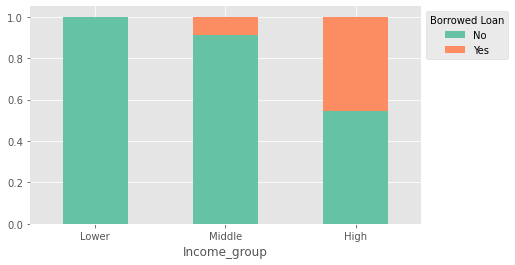

PersonalLoan       0    1   All
Spending_group                 
Low             1341   39  1380
Medium          2292   79  2371
High             886  362  1248
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


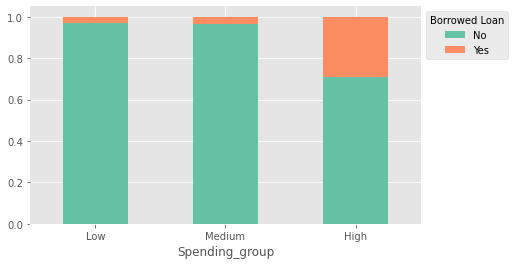

In [74]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_loan[variable])

**Observations**

Number of Customers with Family size of 3 who had borrowed loans from the bank is greatet than other family size
60 of those who had Personal loan with the bank also had Securities_Account.
Customers who had certificate of deposit with the bank had previously borrowed loan
Customers using Online facilities has no impact on personal loan
Majority customers who did have Personal loan with the bank did not used CrediCard from other banks.
Majority customers who had take personal loan before are from LosAngeles and Bay region.
Ratio of borrowing loan is high in 30 and below and 60 and above customers.
Customer with high average Monthly spending have bought personal loan before
As expected Age and experience are highly correlated and one of them can be dropped. Since experience had negative values dropping experience would be better option.

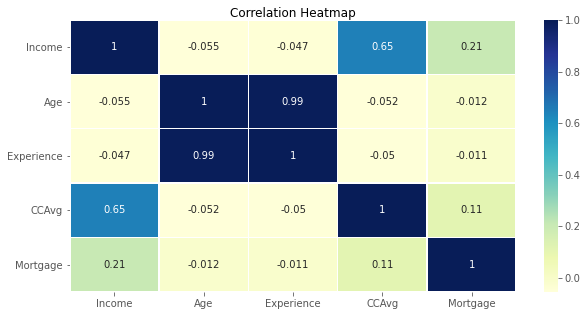

In [75]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

**Check distrubution in target column**

([<matplotlib.patches.Wedge at 0x1d86d324e80>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.4%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.6%')])

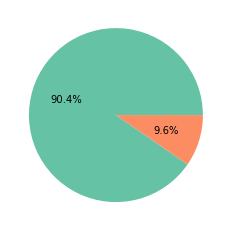

In [76]:
plt.pie(data=df_loan,x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset. This can be handled using weight or SMOTE.But for now we will carry with on without SMOTE

In [77]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium,Los Angeles Region
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium,Bay Area
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High,Bay Area
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium,Los Angeles Region


In [78]:
# Saving dataset before treating outliers for logistic regression.
df_Decision=df_loan.copy()

**Insights based on EDA**
Summary of EDA
Data Description:

Dependent variable is the Personal_loan which is of categorical data type.
Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
There were no missing values in the dataset.
Data Cleaning:

We observed that some observations where experience = -ve but since there was a strong correlation with age , we dropped experience.
There are 450 unique zipcode, we mapped it to counties. They were further mapped to regions to reduce the dimension of data and we now have only 5 distinct values in the data.
We also created Age bin ,Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.
Observations from EDA:

People with higher income had opted for personal loan before.
People with high mortgages opted for loan.
Customers will higher average monthly credit usage have opted for loan.
Customers with Family of 3 members had borrowed the loans with the bank.
Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.
Customers who had certificate of deposit with the bank had previously borrowed loan
Majority of customers who did have Personal loan with the bank used Online facilities.
Majority customers who had take personal loan before are from LosAngeles region.
Ratio of borrowing loan is high in 30 and below and 60 and above customers.
The more income you get the more you spend and have a "large than life" lifestyle.
Customer segmentation for borrowing loan based on EDA
Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.
Few Customer in medium income group don't have higher mortages and have less average monthly credit card spending .They are average profile clients.
Customer in lower income group have less mortages( few outliers are there) ,less monthly spending. They are our low profile clients.
Actions for data pre-processing:

Many variables have outliers that need to be treated.
We can drop Experience, Country,Zipcode and Agebin,Income_group,Spending_group.

**Outliers detection**

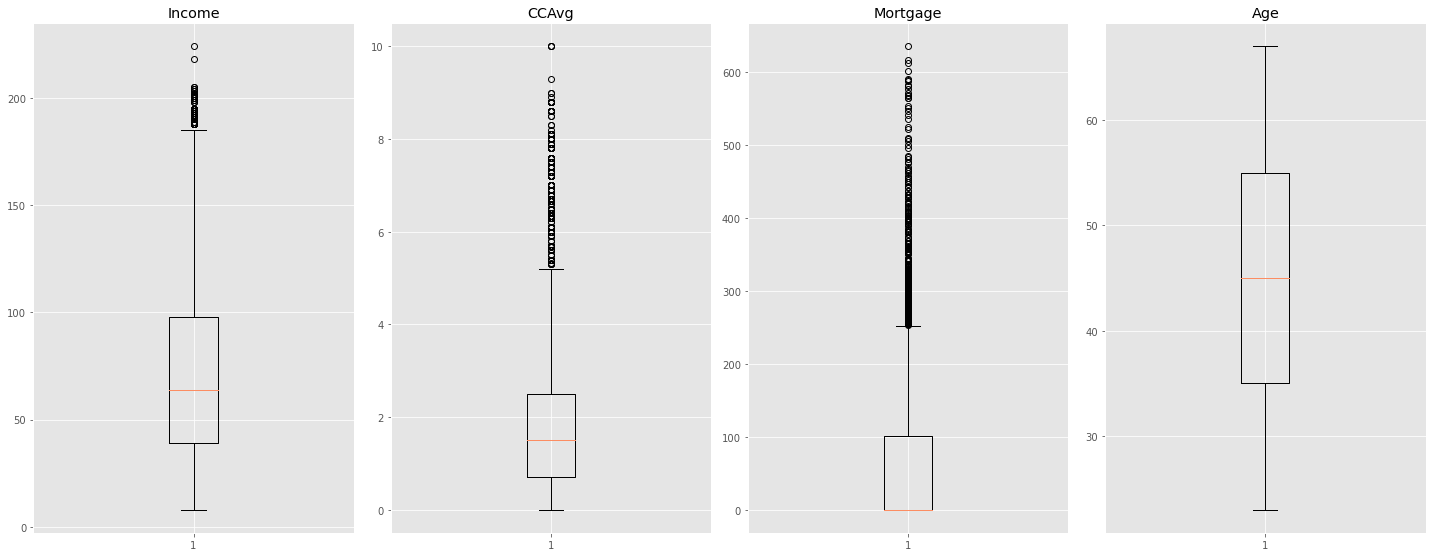

In [79]:
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [80]:
# Check Income extreme values
df_loan.sort_values(by=["Income"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
3896,48,24,224,93940,2,6.67000,1,0,0,0,1,1,1,Monterey County,41-50,High,High,Bay Area
4993,45,21,218,91801,2,6.67000,1,0,0,0,0,1,0,Los Angeles County,41-50,High,High,Los Angeles Region
526,26,2,205,93106,1,6.33000,1,271,0,0,0,0,1,Santa Barbara County,18-30,High,High,Southern
2988,46,21,205,95762,2,8.80000,1,181,0,1,0,1,0,El Dorado County,41-50,High,High,Central
677,46,21,204,92780,2,2.80000,1,0,0,0,0,1,0,Orange County,41-50,High,High,Southern


In [81]:
df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
3896,48,24,224,93940,2,6.67000,1,0,0,0,1,1,1,Monterey County,41-50,High,High,Bay Area
196,48,24,165,93407,1,5.00000,1,0,0,0,0,0,1,San Luis Obispo County,41-50,High,High,Southern
2217,48,24,162,91355,4,3.30000,2,446,1,0,1,1,0,Los Angeles County,41-50,High,High,Los Angeles Region
4629,48,24,148,91311,2,3.30000,1,0,0,0,1,1,1,Los Angeles County,41-50,High,High,Los Angeles Region
4167,48,24,144,94025,4,3.50000,2,0,1,0,0,0,0,San Mateo County,41-50,High,High,Bay Area


In [82]:
# Check Mortgage extreme values
df_loan.sort_values(by=["Mortgage"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
2934,37,13,195,91763,2,6.50000,1,635,0,0,0,1,0,San Bernardino County,31-40,High,High,Southern
303,49,25,195,95605,4,3.00000,1,617,1,0,0,0,0,Yolo County,41-50,High,High,Central
4812,29,4,184,92126,4,2.20000,3,612,1,0,0,1,0,San Diego County,18-30,High,Medium,Southern
1783,53,27,192,94720,1,1.70000,1,601,0,0,0,1,0,Alameda County,51-60,High,Medium,Bay Area
4842,49,23,174,95449,3,4.60000,2,590,1,0,0,0,0,Mendocino County,41-50,High,High,Superior


In [83]:
# Check CCAVg extreme values
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
2101,35,5,203,95032,1,10.00000,3,0,1,0,0,0,0,Santa Clara County,31-40,High,High,Bay Area
2337,43,16,201,95054,1,10.00000,2,0,1,0,0,0,1,Santa Clara County,41-50,High,High,Bay Area
787,45,15,202,91380,3,10.00000,3,0,1,0,0,0,0,Los Angeles County,41-50,High,High,Los Angeles Region
3943,61,36,188,91360,1,9.30000,2,0,1,0,0,0,0,Ventura County,61-100,High,High,Southern
1339,52,25,180,94545,2,9.00000,2,297,1,0,0,1,0,Alameda County,51-60,High,High,Bay Area


This is some really extreme values in income 224K USD compared to same age group and experience. Values for Credit card and Mortages looks fine.After identifying outliers, we can decide whether to remove/treat them or not. It depends,here I am not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

In [84]:
df_loan

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium,Los Angeles Region
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium,Bay Area
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High,Bay Area
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium,Los Angeles Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0,Orange County,18-30,Lower,Medium,Southern
4996,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0,San Diego County,18-30,Lower,Low,Southern
4997,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0,Ventura County,61-100,Lower,Low,Southern
4998,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0,Los Angeles County,61-100,Lower,Low,Los Angeles Region


In [85]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

In [86]:
#drop column which we don't need for modelling
df_loan.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [87]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Income             4999 non-null   int64   
 2   Family             4999 non-null   category
 3   CCAvg              4999 non-null   float64 
 4   Education          4999 non-null   category
 5   Mortgage           4999 non-null   int64   
 6   PersonalLoan       4999 non-null   category
 7   SecuritiesAccount  4999 non-null   category
 8   CDAccount          4999 non-null   category
 9   Online             4999 non-null   category
 10  CreditCard         4999 non-null   category
 11  Regions            4999 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 429.3+ KB


We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we will only make dummies for Regions and Education.

In [88]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [89]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [90]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

# Model building Logistic Regression

**Model evaluation criterion**

**Model can make wrong predictions as:**
Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

**Which case is more important?**
The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.

**How to reduce losses?i.e need to reduce False Negatives ?**
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.
We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [91]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [92]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [93]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

**Logistic Regression (with Sklearn library)**

 MODEL PERFORMANCE
 Accuracy   : Train: 0.658  Test:  0.65
 Recall     : Train: 0.979  Test: 0.986
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


TypeError: plot() got an unexpected keyword argument 'colorbar'

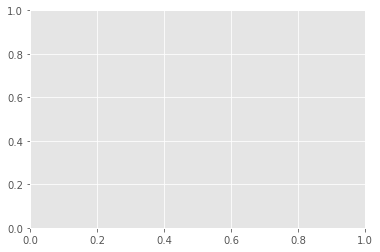

In [94]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)

In [95]:
add_score_model(scores_Sklearn)

NameError: name 'scores_Sklearn' is not defined

**Logistic Regression (with Statmodel)**

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


TypeError: plot() got an unexpected keyword argument 'colorbar'

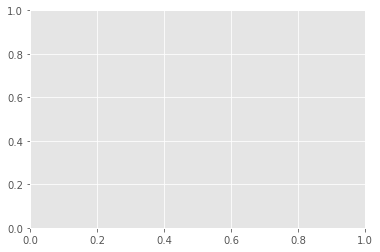

In [96]:
# adding constant to training and test set
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  #0 for sklearn and 1 for statmodel
logit = sm.Logit( y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

# Let's check model performances for this model
scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,y_train,y_test,statmodel)
 

In [100]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6399
Time:                        16:31:19   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.

**Test Assumption**

MultiCollinearity

we will have to check and remove multicollinearity from the data to get reliable coefficients and p-values. There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.* General Rule of thumb: If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables. Whereas if VIF exceeds 5, we say it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [97]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train_stat.astype(float).copy()

In [98]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        1.00000
Age                          1.01012
Income                       1.90786
Family                       1.05016
CCAvg                        1.74332
Mortgage                     1.06417
SecuritiesAccount            1.15538
CDAccount                    1.35839
Online                       1.04689
CreditCard                   1.11481
Regions_Central              1.11765
Regions_Los Angeles Region   1.22077
Regions_Southern             1.24130
Regions_Superior             1.02791
Education_2                  1.28721
Education_3                  1.25893
dtype: float64



**Observations:** There is no correlation between predicator variables

In [99]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6399
Time:                        16:30:14   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**In this case 'Regions' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.**

In [101]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6371
Time:                        16:33:17   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**The Pvalue for Mortgage is 0.264 So droping Mortage**

In [102]:
 X_train2 = X_train1.drop(['Mortgage'], axis = 1)
 X_test2= X_test1.drop(['Mortgage'], axis = 1)
 logit2 = sm.Logit(y_train, X_train2.astype(float))
 lg2 = logit2.fit()
 lg2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6366
Time:                        16:34:22   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Dropping Age as pvalue is greater than 0.05**

In [103]:
 X_train3 = X_train2.drop(['Age'], axis = 1)
 X_test3= X_test2.drop(['Age'], axis = 1)
 logit3 = sm.Logit(y_train, X_train3.astype(float))
 lg3 = logit3.fit()
 lg3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.6355
Time:                        16:34:57   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**CCavg is important parameter as per EDA so not dropping it**

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


TypeError: plot() got an unexpected keyword argument 'colorbar'

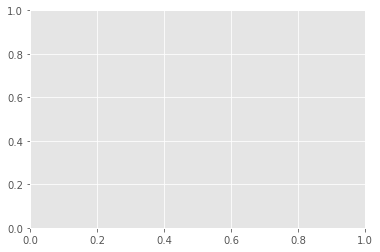

In [104]:
# Let's check model performances for this model

scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)
add_score_model(scores_statmodel)

**ROC-AUC curve**

***Roc -Auc curve on Train data***

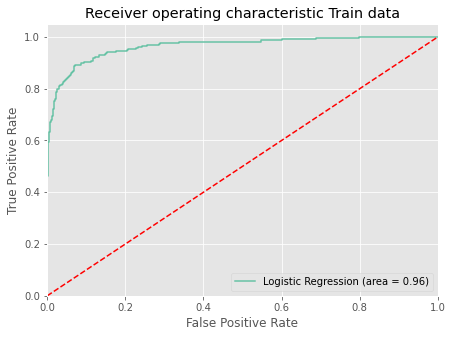

In [105]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()

**Roc -Auc curve on Test data**

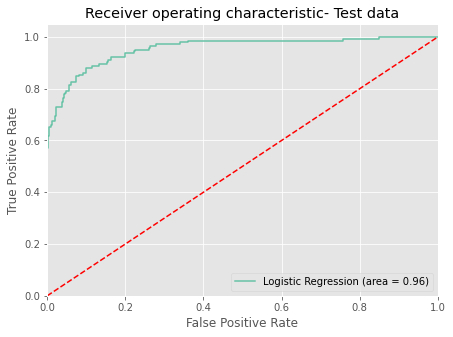

In [106]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a generalized performance on training and test set.

ROC-AUC score of 0.96 on training and test set is quite good.

**Coefficient interpretations**

Coefficient of Income, Education, Family,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan

Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.

**Converting coefficients to odds**

-The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

-Therefore, odds = exp(b)

-Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

-The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [107]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg3.params, columns=['coef'])
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change of Odds']=(np.exp(lg3.params)-1)*100
lgcoef['pval']=lg3.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef

,coef,Odds Ratio,Probability,Percentage Change of Odds,pval
Income,3.00,20.14,0.95,1913.74,0.00
Education_3,1.95,7.04,0.88,603.79,0.00
Education_2,1.83,6.25,0.86,525.17,0.00
CDAccount,0.84,2.33,0.70,132.66,0.00
Family,0.77,2.16,0.68,115.78,0.00
CCAvg,0.18,1.20,0.54,19.63,0.05
SecuritiesAccount,-0.23,0.79,0.44,-20.85,0.04
Online,-0.34,0.72,0.42,-28.50,0.00
CreditCard,-0.39,0.68,0.40,-31.98,0.00
const,-5.17,0.01,0.01,-99.43,0.00


Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 20 times or a 95% chance of a customer taking personal loan.
    
Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 2.16 times increase in the odds of a customer taking personal loan.
    
CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.22 times or a 22.16% increase in the odds of a customer taking personal loan.
    
Education Advance has 7 times higher chances of taking a personal loan than undergraduate Interpretation for other attributes can be done similarly.

***Most overall significant varaibles are Income,Education, CD account ,Family and CCAvg***

**Model performance evaluation and improvement**

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


TypeError: plot() got an unexpected keyword argument 'colorbar'

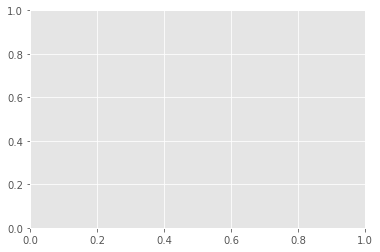

In [109]:
# Let's check model performances for this model
scores_LR = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)

# Model building Decision Tree

Data preparation

Partition the data into train and test set.

Built a CART model on the train data.

Tune the model and prune the tree, if required.

Test the data on test set.

In [110]:
#drop column which we don't need for modelling
df_Decision.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [111]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [112]:
#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

**Build Model**

We are using 'gini' criteria to split.
If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

In [113]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.984
 Recall   : Train : 1.0  Test: 0.9027777777777778


TypeError: plot() got an unexpected keyword argument 'colorbar'

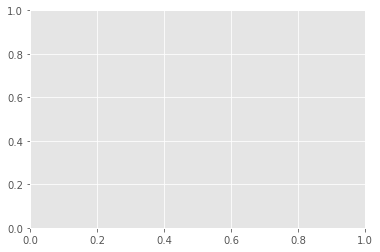

In [114]:
#since data is imbalanced adding weights
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

**Visualizing the Decision Tree**

In [115]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


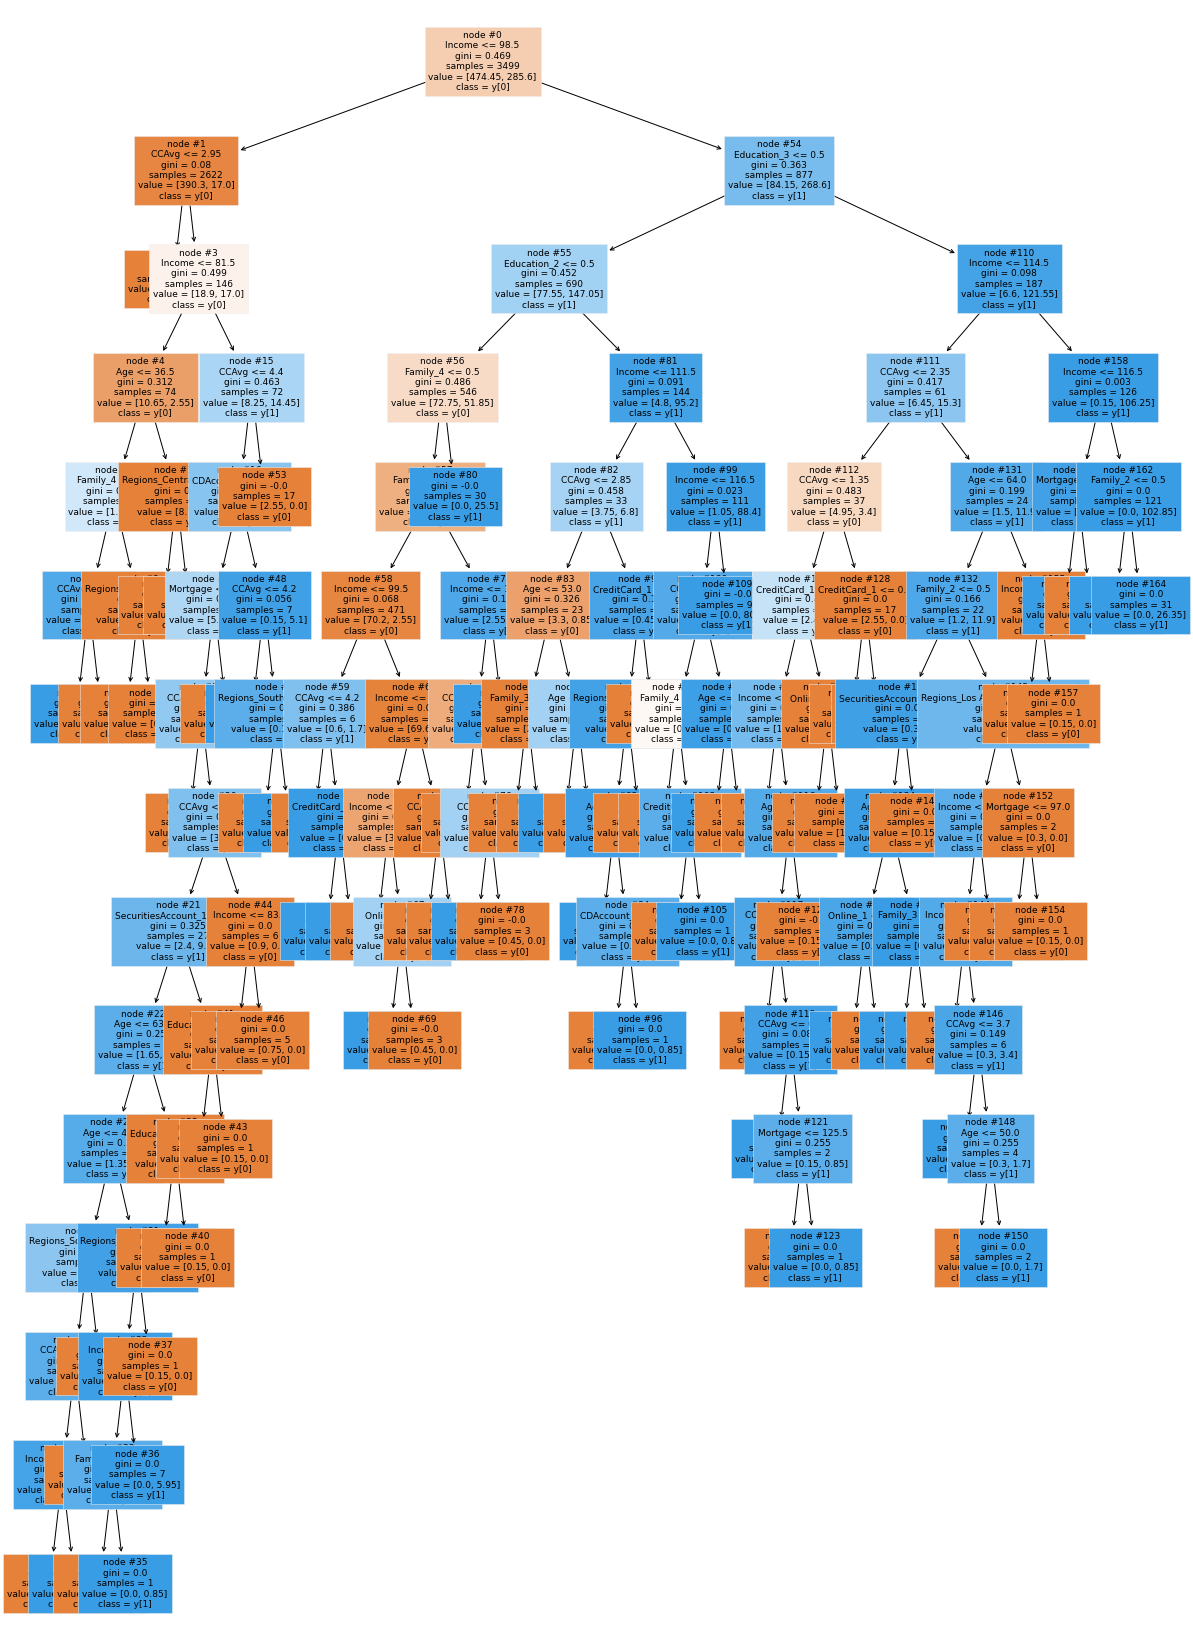

In [116]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |--- weights: [8.25, 0.00] class: 0
|   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|  

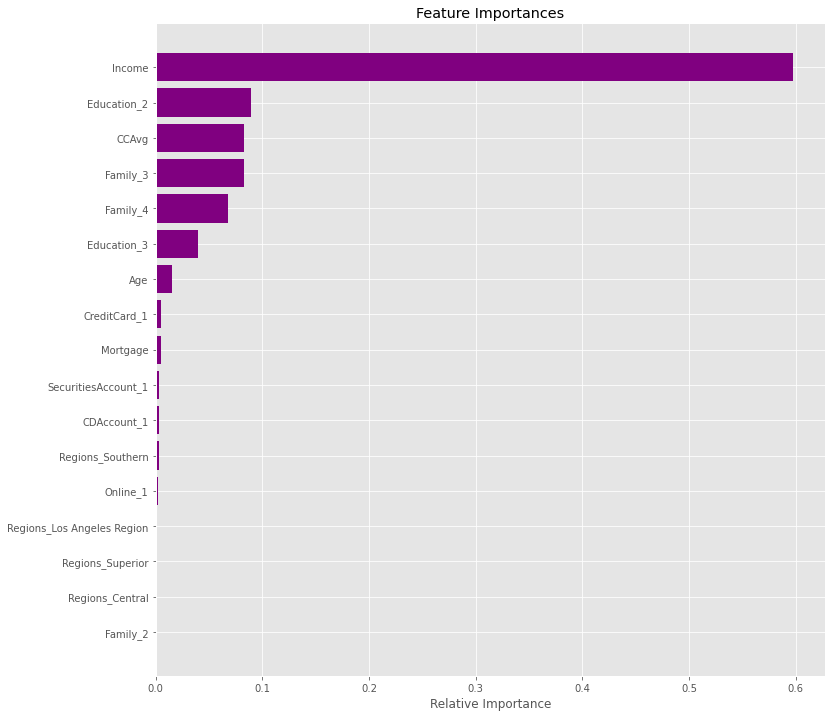

In [118]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Using GridSearch for Hyperparameter tuning of our tree model**

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

It is an exhaustive search that is performed on a the specific parameter values of a model.

The parameters of the estimator/model used to apply these methods are optimized by cross-

validated grid-search over a parameter grid.

Let's see if we can improve our model performance even more.

In [119]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=2,
                       random_state=1)

In [120]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

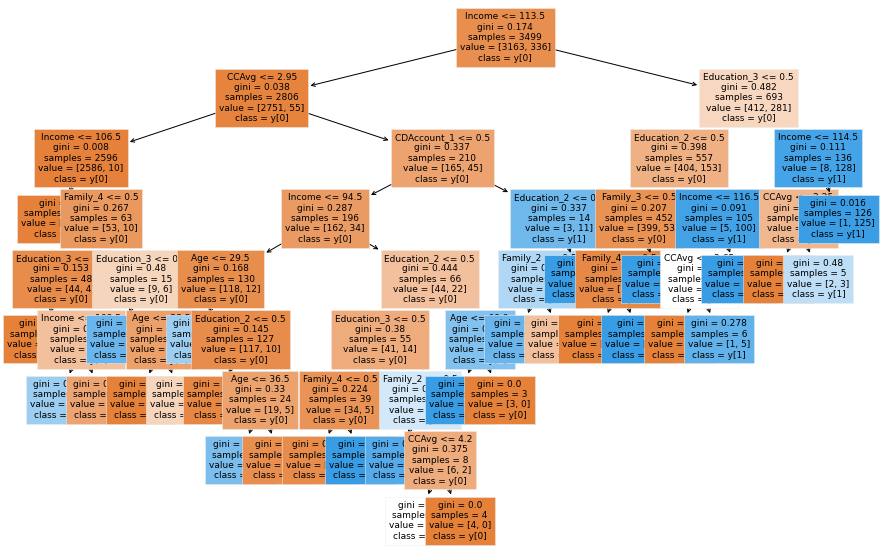

In [121]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

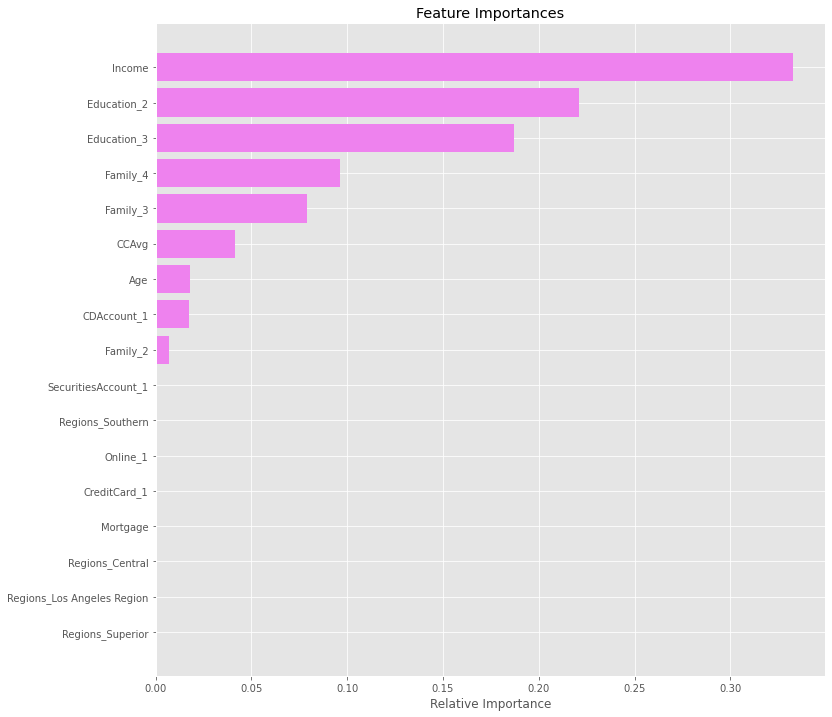

In [122]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.992283509574164  Test: 0.984
 Recall   : Train : 0.9494047619047619  Test: 0.9166666666666666


TypeError: plot() got an unexpected keyword argument 'colorbar'

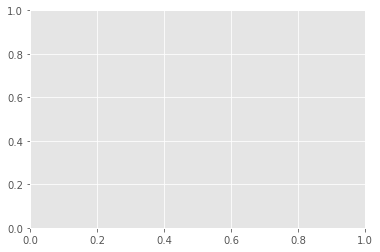

In [123]:
get_recall_score(estimator)

-With HyperParameter max_depth=6, max_leaf_nodes=20, min_samples_leaf=7 the overfitting on train has reduced, but the recall for test has not improved.

-Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.

-But the recall metric is still 91 and false negatives are 12.We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

**Cost Complexity Pruning**

In [125]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

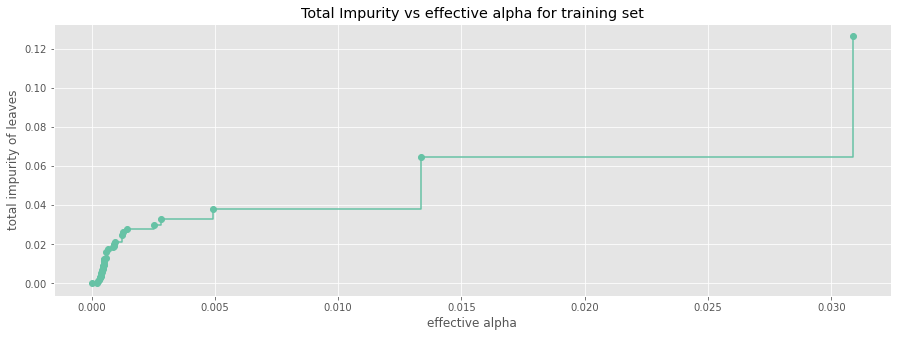

In [126]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [127]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    clfs.append(clf)

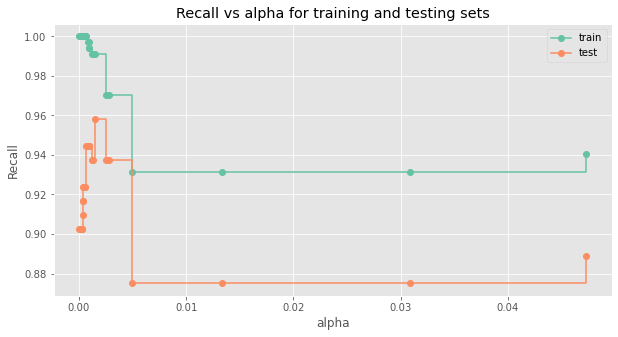

In [128]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We are gettingt a higher recall on test data between 0.002 to 0.005. Will choose alpha as 0.002.

Creating model with 0.002 ccp_alpha¶


In [129]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9794226921977708  Test: 0.9753333333333334
 Recall   : Train : 0.9791666666666666  Test: 0.9583333333333334


TypeError: plot() got an unexpected keyword argument 'colorbar'

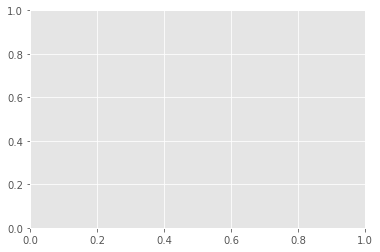

In [130]:
get_recall_score(best_model)

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

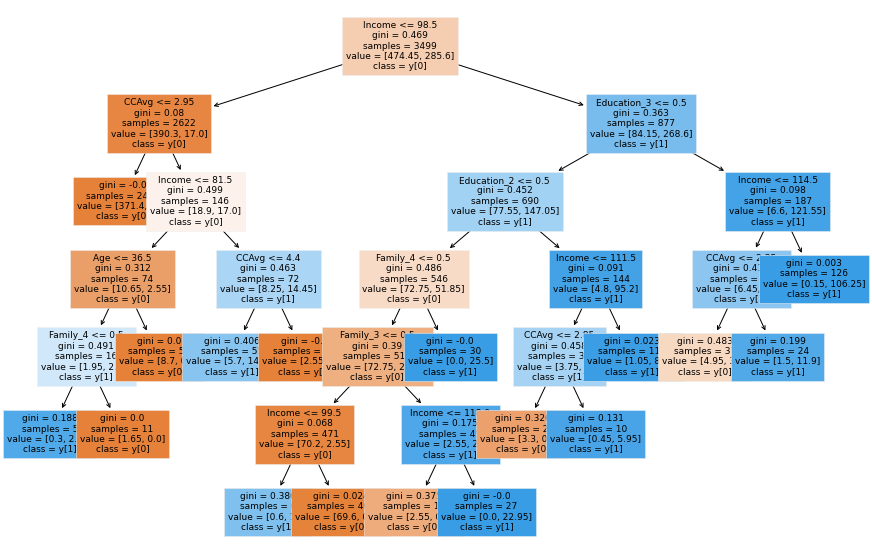

In [131]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [132]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 14.45] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.55, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 99.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |   |--- Income >  99.50
|   |   |   |   |   |   |--- weights: [69.60, 0.85] class: 0
|   

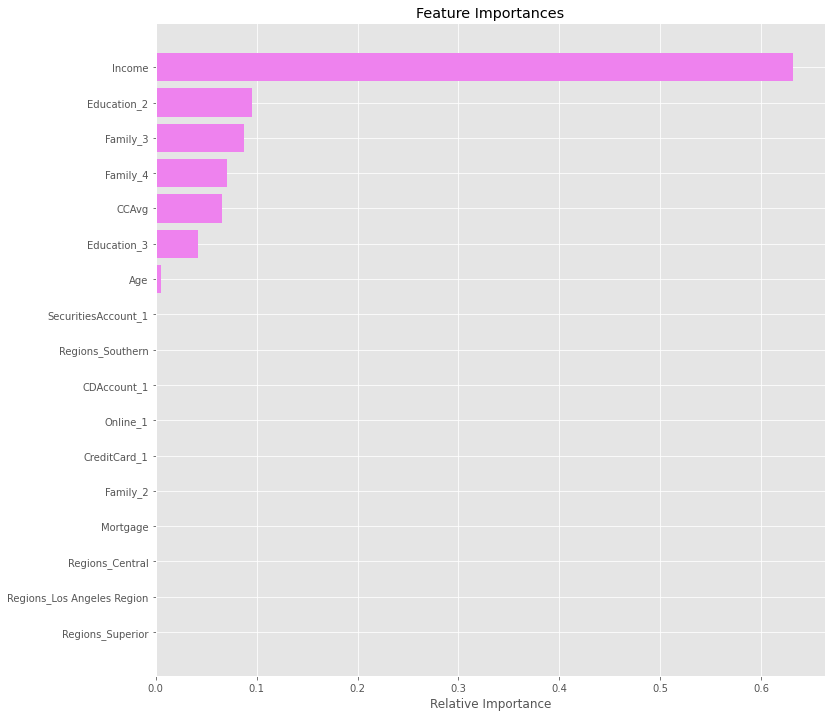

In [133]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We are getting a higher recall on test data between 0.002 to 0.005. Will choosed alpha as 0.002.

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

Important features : Income, Graduate education, Family member 3 and 4, Ccavg, Advanced education, Age.

This is the best model as false negative is only 6 on Testdata.

**Comparing all the models based on Model Performance**

In [134]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall
0,Logisitic Regression with Optimal Threshold 0.104,0.92,0.91,0.90,0.88
1,Initial decision tree model,1.00,0.98,1.00,0.86
2,Decision treee with hyperparameter tuning,0.99,0.98,0.92,0.84
3,Decision tree with post-pruning,0.98,0.97,0.98,0.96


Decision tree model post pruning has given us best recall scores on data with 97% accuracy . Exploratory data analysis also suggested income and education were important features in deciding if person will borrow personal loan. so choosing Decision Tree with post-pruning for our prediction.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500



TypeError: plot() got an unexpected keyword argument 'colorbar'

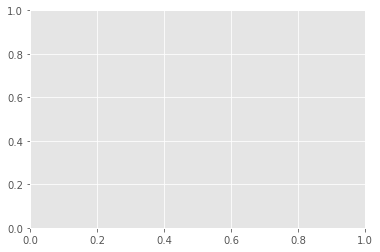

In [135]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt,y_pred))
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")

Observation

After Post Pruning ,the false negative has reduced to 6.The accuracy on test data is 97% & Recall is 97% after choosing optimal cc-alpha.